## <center>Loan Payoff Prediction: Comparing Perfrmance of K - Nearest Neighbors, Decision Tree, Support Vector Machine, and Logistic Regression Algorithms </center>

Author: Keshab R Sapkota

### Abstract

Aim of this project is to compare the performance of different algorithms to predict a binary classification problem. The past loan dataset of 346 customers whose loan are either paidoff or defaulted is obtained from 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'. The dataset is splitted into train and test sets and normalized each sets independently. Machine learning models are constructed using K-Nearest Neighbors (KNN), Decision Tree, Support Vector Machine (SVM), and Logistic Regression algorithms and trained with the train data set using 'PAIDOFF' and 'COLLECTION' as two labels. Then, the models are used to predict using test dataset if a customer is likely to pay the loan or default it.  Performance metrics such as accuracy and F1-socre are evalueated for each model. The dataset contains smaller subset of 'COLLECTION label compared to the 'PAIDOFF' label. This assymetry in the data can mislead the performance of models if only one type of metric such as accuracy is taken into account. Accuracy, for example, only accounts for the total number of correct prediction over the whole dataset and does not capture the inability of a model to correctly predict the smaller subset of labels. To mitigate this issue, two metrics- accuracy and F1-scores are used to compare the performance as F1-score depends on the correct classification of both binary labels.  The binary classification can be imporved by symmetrization of data. To improve the prediction, each model is trained by optimizing model parameters and best parameter values are chosen to compare the models performance. From the obtained results, KNN produced the best prediction over the remaining models with highest accuracy and F1 scores. 

Disclamer: This project was part my assignment of "Pyton for Data Science" course from IBM.

**Contents <a name = 'content'/>**
<ol>
    <li><a href = #1>About dataset </a></li>
    <li><a href = #2>Load data </a></li>
    <li><a href = #3>Data visualization</a></li>
    <li><a href = #4>Data preprocessing</a></li>
    <ol>
        <li><a href = #4a>Convert catagorical features to numerical values </a></li>
        <li><a href = #4b>One hot encoding</a></li>
        <li><a href = #4c>Features selection</a></li>
    </ol>
    <li><a href = #5>Data normalization </a></li>
    <li><a href = #6>Classification </a></li>
    <ol>
        <li><a href = #6a>K Nearest Neighbors (KNN) </a></li>
        <li><a href = #6b>Decision Tree </a></li>
        <li><a href = #6c>Support Vector Machine (SVM) </a></li>
        <li><a href = #6d>Logistic Regression </a></li>
    </ol>
    <li><a href = #7>Summary </a></li>
</ol> 
      
        

## 1. About dataset <a name = '1'/>

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

Lets download the dataset

In [2]:
loan_data = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'

## 2. Load Data <a name = '2'/>

In [3]:
df = pd.read_csv(loan_data)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

#### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## 3. Data visualization <a name = '3'/>

Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

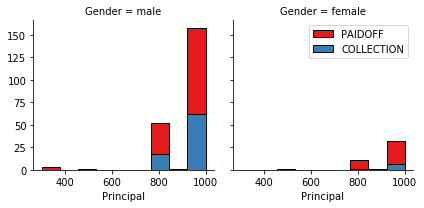

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

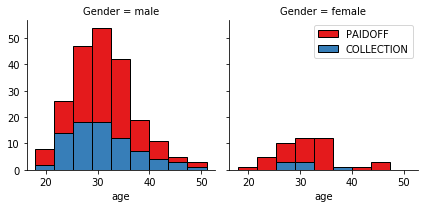

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## 4. Data pre-processing <a name = '4'/>

Lets look at the day of the week people get the loan 

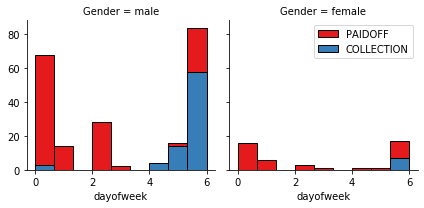

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### A. Convert Categorical features to numerical values<a name = '4a'/>

Lets look at gender:

In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### B. One Hot Encoding  <a name = '4b'/>
#### Impact of education

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Using one hot encoding technique to conver categorical varables to binary variables and appending them to the feature Data Frame 

In [15]:
edu_cat = df['education'].unique().tolist()
edu_cat

['High School or Below', 'Bechalor', 'college', 'Master or Above']

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
print(Feature.shape)

(346, 8)


### C. Features selection <a name = '4c'/>

Lets defind feature sets, X:

In [17]:
X = Feature
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Checking labels

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## 5. Data Normalization<a name = '5'/>

Data Standardization gives zero mean and unit variance. Let's split data into train and test set and carry out normalizaiton of trian and test datasets independently.

In [19]:
#Train test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Train data: (276, 8) (276,)
Test data: (70, 8) (70,)


Next, normalize data.

In [20]:
Xn_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
Xn_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
Xn_train[0:3], Xn_test[0:3]

(array([[ 0.50222902,  0.89955009, -0.8003404 , -0.3934612 ,  0.77759319,
         -0.36851387,  1.14861992, -0.89006056],
        [ 0.50222902,  0.89955009,  0.18359702, -0.3934612 , -1.2860195 ,
         -0.36851387,  1.14861992, -0.89006056],
        [ 0.50222902,  0.89955009,  0.34758659, -0.3934612 ,  0.77759319,
         -0.36851387, -0.87061001,  1.12351906]]),
 array([[ 0.56908067,  1.00852022, -1.59449106, -0.52223297,  1.05887304,
         -0.43178777,  1.08972474, -0.79240582],
        [-1.12605324, -0.86904402,  2.05644641, -0.52223297,  1.05887304,
         -0.43178777,  1.08972474, -0.79240582],
        [-1.12605324, -0.86904402,  0.83946726, -0.52223297, -0.94440028,
         -0.43178777, -0.91766294,  1.26197963]]))

## 6. Classification <a name = '6'/>

Following algorithms have been used to bulild models and accuracy of different models have been compared
<ul>
    <br>A. K Nearest Neighbor(KNN)
    <br>B. Decision Tree
    <br>C. Support Vector Machine
    <br>D. Logistic Regression

### A. K Nearest Neighbor(KNN)<a name = '6a'/>
Here, KNN is applied on the train dataset and accuracy is calculated as a function of k (nearest neighbors). The goal is to find value of k  that maximizes accuracy.

##### Train and test KNN model
Train KNN model with ragne of k values

In [21]:
#Train KNN model
from sklearn.neighbors import KNeighborsClassifier

k = 20
accuracy_knn, f1_knn = [], []

for i in range(1, k):
    knn_classifier = KNeighborsClassifier(n_neighbors = i).fit(Xn_train, y_train)
    y_hat = knn_classifier.predict(Xn_test)
    
    accuracy = metrics.accuracy_score(y_test, y_hat)
    accuracy_knn.append(accuracy)
    
    f1 = metrics.f1_score(y_test, y_hat, average = 'weighted') 
    f1_knn.append(f1)


##### Find best k that maximizes accuracy and F1 scores.

Maximum Accuracy =  0.83  for k =  14
Maximum weighted F1 score =  0.83 for k =  14


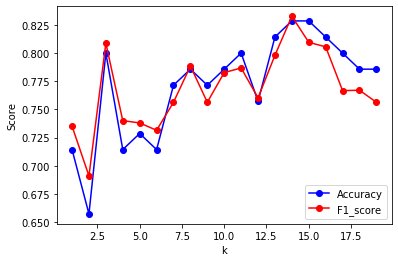

In [22]:
#What are the best values of k that maximizes accuracy and f1 scores?   
k_maxAccuracy = np.argmax(accuracy_knn) + 1 # k value starts from 1, so k_best = argmax +1
k_maxF1 = np.argmax(f1_knn) + 1

#And what are maximum accuray and f1 scores
maxAccuracy_knn = np.round(max(accuracy_knn), 2)
maxF1_knn = np.round(max(f1_knn), 2)

print('Maximum Accuracy = ', maxAccuracy_knn, ' for k = ', k_maxAccuracy)
print('Maximum weighted F1 score = ', maxF1_knn, 'for k = ', k_maxF1)

#Plot accuracy score with k values
plt.plot(range(1, k), accuracy_knn, 'ob-', label = 'Accuracy')
plt.plot(range(1, k), f1_knn, 'or-', label = 'F1_score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

##### Define a function to plot confusion matrix
This function will be caleed in all the models to plot confusion matrix.

In [23]:
import itertools
 #This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [-0.5, 0, 0.5, 1, 1.5]
    classes = np.insert(classes, [0, 1, 2], ['','',''])
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


##### Plot confusion matrix

Confusion matrix, without normalization


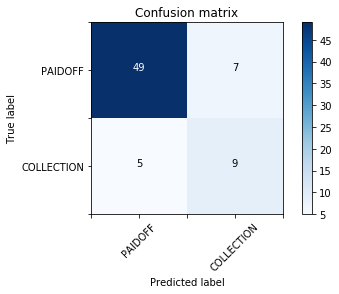

In [24]:
# Use KNN classifier for best k
knn_classifier = KNeighborsClassifier(n_neighbors = k_maxF1).fit(Xn_train, y_train)
y_knnhat = knn_classifier.predict(Xn_test)
    
cm_knn = metrics.confusion_matrix(y_test, y_knnhat, labels=['PAIDOFF', 'COLLECTION'])
np.set_printoptions(precision=2)

#print ('Classification Report \n', classification_report(y_test, y_knnhat))
#f1_knn = f1_score(y_test, y_knnhat, average = 'weighted')
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_knn, classes=['PAIDOFF', 'COLLECTION'],normalize= False,  title='Confusion matrix')

### B. Decision Tree <a name = '6b'/>

Decision trees are not affected by positive monotonic transformation (preserving the order of the data). So, normalizaiton is not necessary. In this problem, normalization can cause ambiguity on parameter 'age' (normalized age will have negative values) when viewed on the decision tree graph. Hence, follwoing analysis is carried out on unnormalized data.

##### Train and test Decision Tree
Some parameters that can be optimized for best result from Desicission Tree Classifier are max_depth, min_sample_split, and min_sample_leaf. Following code shows the training of model with range of max_depth values with optimized min_sample_split and min_sample_leaf values (not shown here).

In [25]:
from sklearn.tree import DecisionTreeClassifier

accuracy_dt, f1_dt = [], []
for i in range(2, 16):
    dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, min_samples_split=3, min_samples_leaf=5)
    dt_classifier.fit(X_train, y_train)
    y_hat = dt_classifier.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_hat)
    accuracy_dt.append(accuracy)
    
    f1 = metrics.f1_score(y_test, y_hat, average = 'weighted')
    f1_dt.append(f1)

##### Find best max_depth for Decision Tree Classifier

Maximum Accuracy =  0.8  for max_depth =  2
Maximum weighted F1 score =  0.78 for max_depth =  8
Accuracy =  0.79 for max_depth =  8
F1 score =  0.69 for max_depth =  2


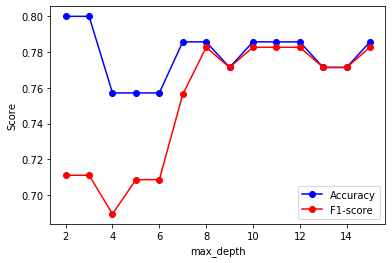

In [26]:
#What are the best values of k that maximizes accuracy and f1 scores?   
depth_maxAccuracy = np.argmax(accuracy_dt) + 2 # max_depth value starts from 2
depth_maxF1 = np.argmax(f1_dt) + 2

#And what are maximum accuray and f1 scores
maxAccuracy_dt = np.round(max(accuracy_dt), 2)
maxF1_kdt = np.round(max(f1_dt), 2)
goodAccuracy_dt = np.round(accuracy_dt[depth_maxF1], 2)
goodF1_dt = np.round(f1_dt[depth_maxAccuracy], 2)

print('Maximum Accuracy = ', maxAccuracy_dt, ' for max_depth = ', depth_maxAccuracy)
print('Maximum weighted F1 score = ', maxF1_kdt, 'for max_depth = ', depth_maxF1)
print('Accuracy = ', goodAccuracy_dt, 'for max_depth = ', depth_maxF1)
print('F1 score = ', goodF1_dt, 'for max_depth = ', depth_maxAccuracy)

#Plot Confusion matrix
plt.plot(list(range(2, 16)), accuracy_dt, 'ob-', label = 'Accuracy')   
plt.plot(list(range(2, 16)), f1_dt, 'or-', label = 'F1-score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()

Since accuracy and F1-score are maximized at different values of max_depth, let's plot confusion matrices  to select most appropriate value of max-depth

Confusion matrix, without normalization


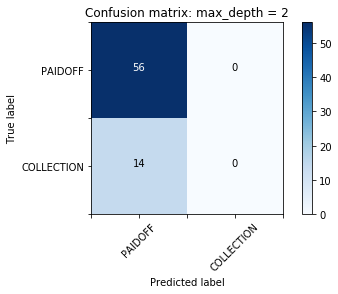

Confusion matrix, without normalization


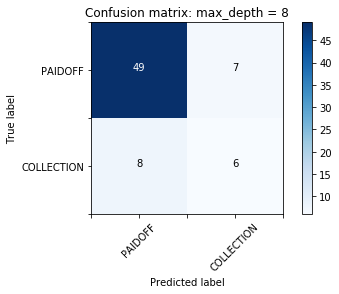

In [27]:
# Plot confusion matrices that maximize accuracy and F1 score
for depth in [depth_maxAccuracy, depth_maxF1]:
    dt_classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                           max_depth = depth, 
                                           min_samples_split=3, min_samples_leaf=5)
    dt_classifier.fit(X_train, y_train)
    y_hatdt = dt_classifier.predict(X_test)

    # Compute confusion matrix
    cm_dt = metrics.confusion_matrix(y_test, y_hatdt, labels=['PAIDOFF', 'COLLECTION'])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm_dt, classes=['PAIDOFF', 'COLLECTION'],
                          normalize= False,  
                          title='Confusion matrix: max_depth = '+str(depth))
    plt.show()

Above result shows that the classifier cannot predict 'COLLECTION' at all. So, max_depth = 2 is not a good choice.
**Based on the above results, let's choose max_depth = 8 for the best result from Decision tree classifier.**

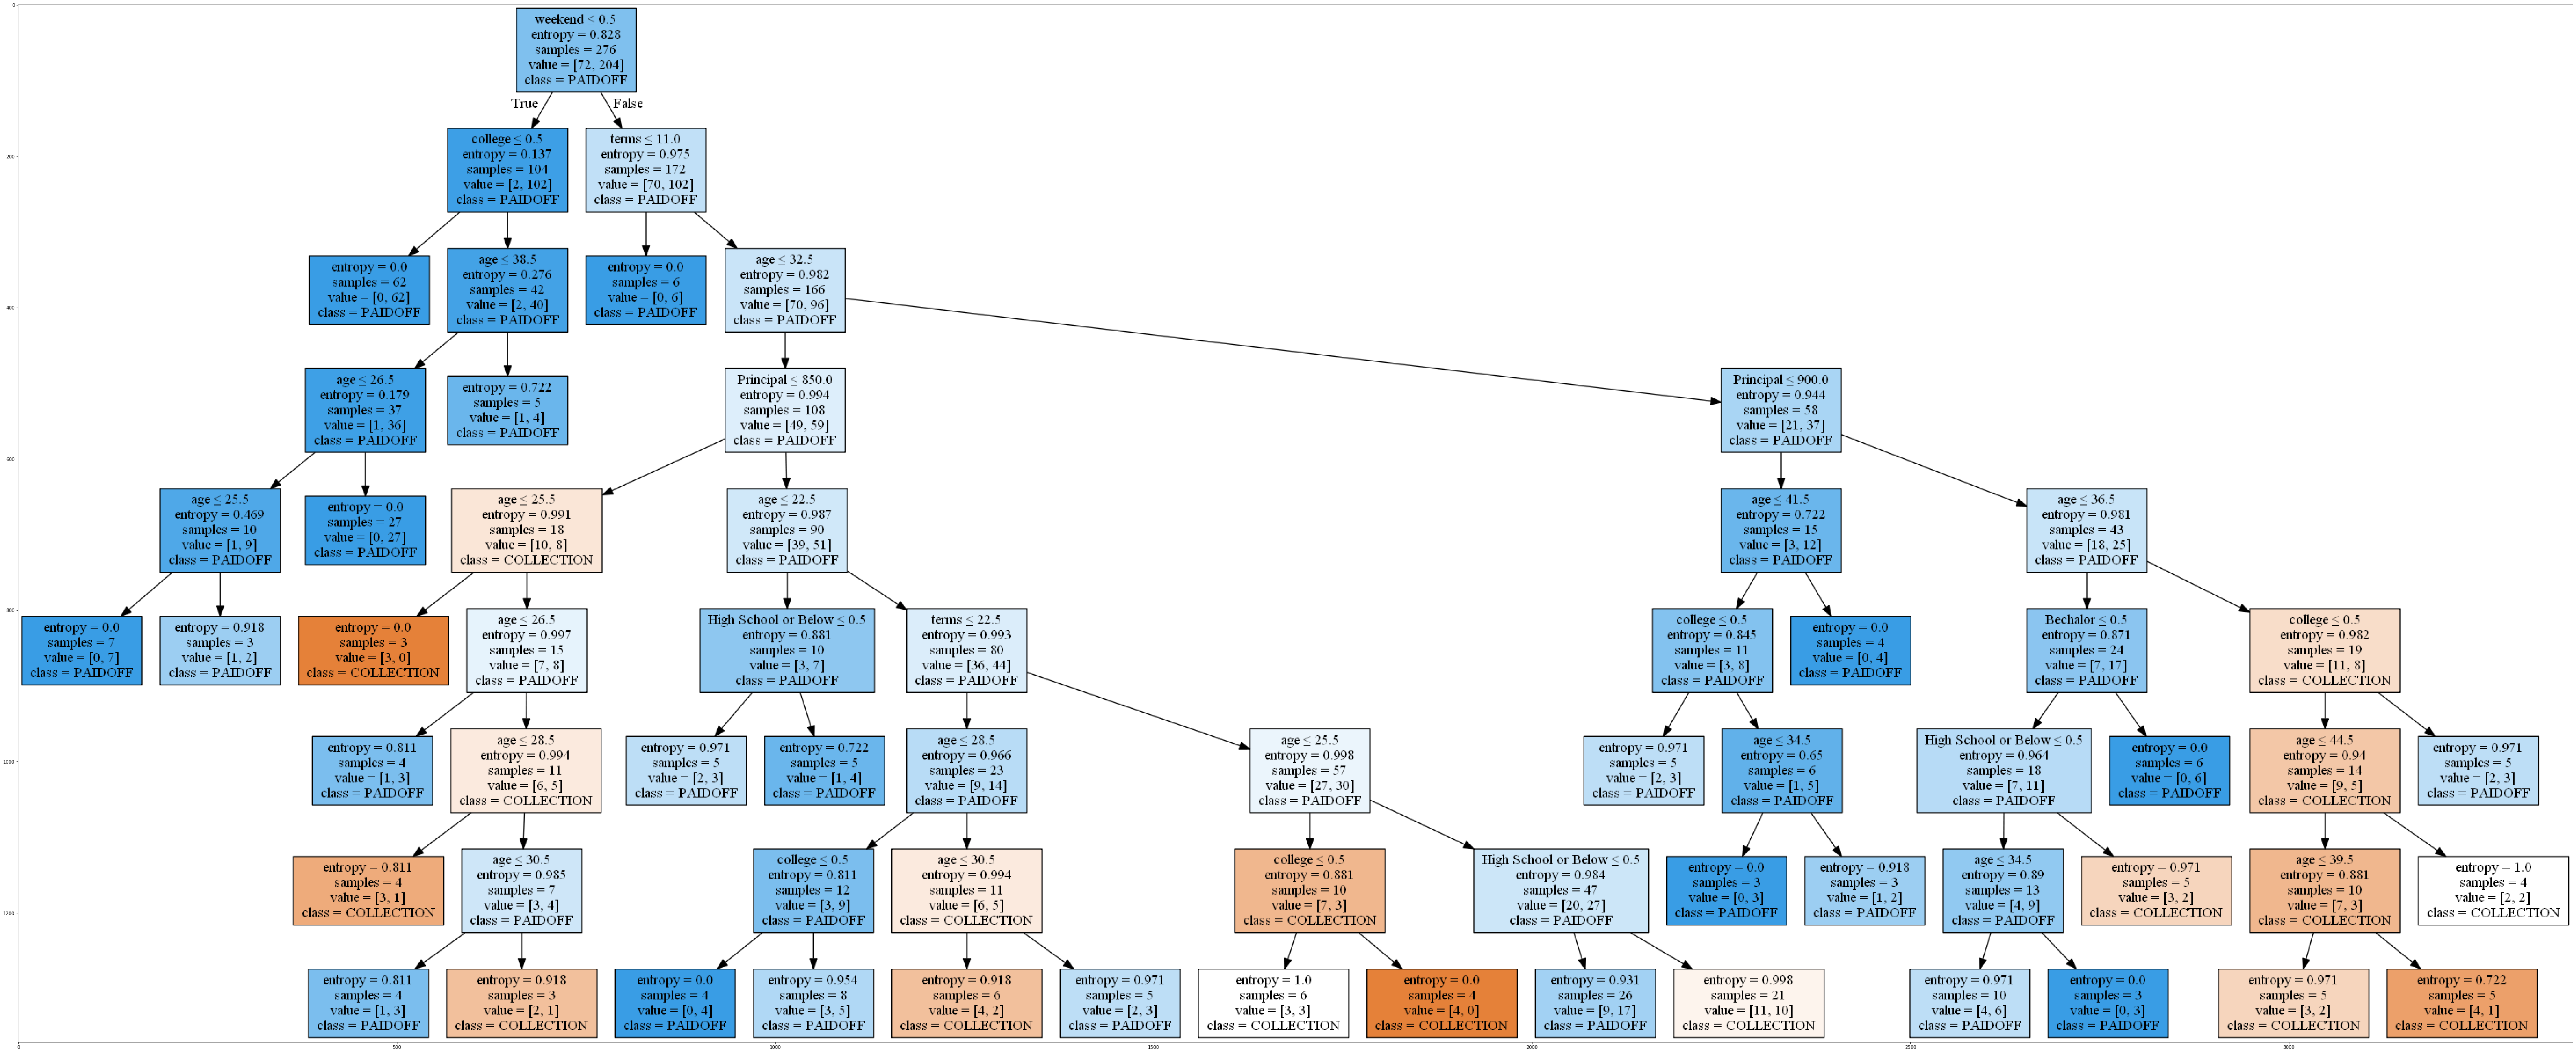

In [28]:
#Vizualization
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

DT_classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                       max_depth = depth_maxF1, 
                                       min_samples_split=5, min_samples_leaf=3)
DT_classifier.fit(X_train, y_train)
y_treeHat = DT_classifier.predict(X_test)

dot_data = StringIO()
filename = "LoanTree.png"
featureNames = Feature.columns[0:8]
targetNames = np.unique(y).tolist()
out=tree.export_graphviz(DT_classifier,feature_names=featureNames,
                         out_file = dot_data, class_names= np.unique(y_train),
                         filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)

#Image(graph.create_png())
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


The decision tree image is a bit overwhelming, but let's live with it for now.

### C. Support Vector Machine (SVM) <a name = '6c'/>

##### Train  and test SVM model
Here the model is trained with linear, rbf, and sigmoid kernels and best kernels will be picked.

Kernel: linear
Accuracy:  0.8
Weighted F1 score: 0.71
Confusion matrix, without normalization


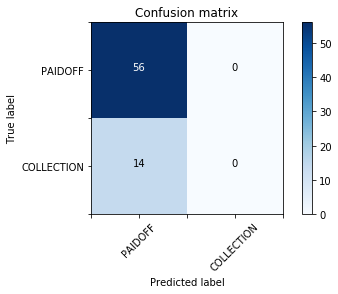

Kernel: rbf
Accuracy:  0.79
Weighted F1 score: 0.73
Confusion matrix, without normalization


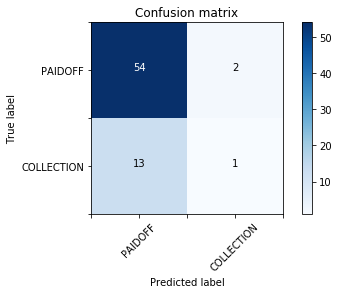

Kernel: sigmoid
Accuracy:  0.76
Weighted F1 score: 0.75
Confusion matrix, without normalization


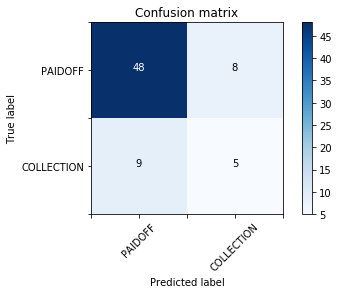

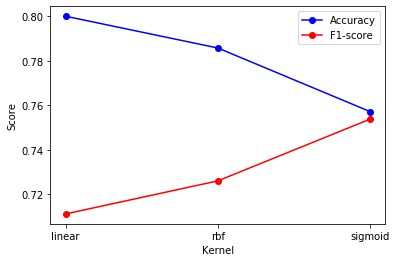

In [29]:
from sklearn import svm

accuracy_svm, f1_svm = [], []
kernels = ['linear', 'rbf', 'sigmoid']
for k in kernels:
    svm_classifier = svm.SVC(C = 1, kernel = k)
    svm_classifier.fit(Xn_train, y_train)
    y_svmhat = svm_classifier.predict(Xn_test)
    
    accuracy = metrics.accuracy_score(y_test, y_svmhat)
    accuracy_svm.append(accuracy)
    
    f1 = metrics.f1_score(y_test, y_svmhat, average = 'weighted')
    f1_svm.append(f1)
    
    print('Kernel: {}'.format(k))
    print('Accuracy: ', np.around(accuracy, 2))
    print('Weighted F1 score:', np.around(f1, 2))
    
    #Plot confusion matrix
    cfmat_svm = metrics.confusion_matrix(y_test, y_svmhat, labels=['PAIDOFF', 'COLLECTION'])
    np.set_printoptions(precision=2)
    plot_confusion_matrix(cfmat_svm, classes=['PAIDOFF', 'COLLECTION'],
                          normalize= False, title='Confusion matrix')
    plt.show()

#Plot and compare accuracy and F1 scores
plt.plot(kernels, accuracy_svm, 'ob-', label = 'Accuracy')   
plt.plot(kernels, f1_svm, 'or-', label = 'F1-score')
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.legend()


From the above results, linear and rbf kernels have higher accuracy but perform poorly to predict 'COLLECTION'. The sigmoid kernel has decent accuracy and also does relatively better job to predict 'COLLECTION'. **So, let's choose sigmoid kernal for this SVM model.**

In [30]:
maxF1_svm = np.around(max(f1_svm), 2)
goodAccuracy_svm = np.around(accuracy_svm[np.argmax(f1_svm)], 2)
goodAccuracy_svm, maxF1_svm

(0.76, 0.75)

### D. Logistic Regression <a name = '6d'/>

##### Train and test model
For small dataset, liblinear solver is a better choice. The model optimization is done here with the inverse regularization strength parameter C.

C: 0.01
Accuracy:  0.74
Weighted F1 score: 0.75
Confusion matrix, without normalization


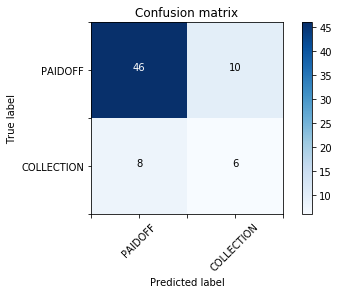

C: 0.1
Accuracy:  0.74
Weighted F1 score: 0.75
Confusion matrix, without normalization


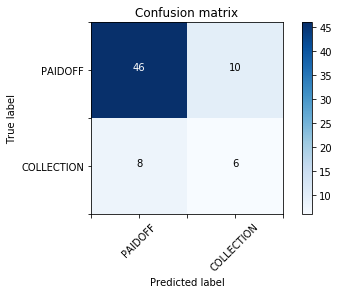

C: 1
Accuracy:  0.71
Weighted F1 score: 0.73
Confusion matrix, without normalization


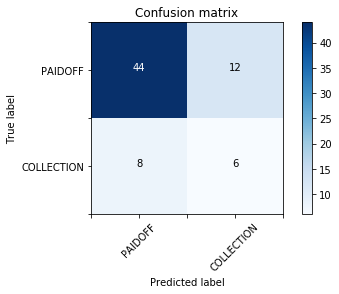

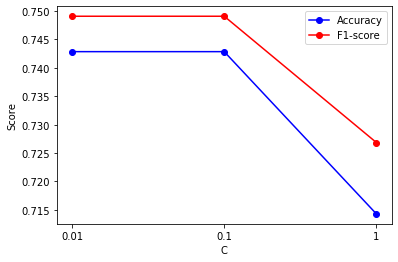

In [31]:
#Modeling
from sklearn.linear_model import LogisticRegression

accuracy_lr, f1_lr = [], []
for i in [0.01, 0.1, 1]:
    LR_classifier = LogisticRegression(C = i, solver= 'liblinear').fit(Xn_train,y_train)
    y_LRhat = LR_classifier.predict(Xn_test)
    
    accuracy = metrics.accuracy_score(y_test, y_LRhat)
    accuracy_lr.append(accuracy)

    f1 = metrics.f1_score(y_test, y_LRhat, average = 'weighted')
    f1_lr.append(f1)

    print('C: {}'.format(i))
    print('Accuracy: ', np.round(accuracy ,2))
    print('Weighted F1 score:', np.round(f1, 2))
    
    #Plot comfusion matrix
    cfmat_svm = metrics.confusion_matrix(y_test, y_LRhat, labels=['PAIDOFF', 'COLLECTION'])
    np.set_printoptions(precision=2)
    plot_confusion_matrix(cfmat_svm, classes=['PAIDOFF', 'COLLECTION'],normalize= False, 
                          title='Confusion matrix')
    plt.show()
    
#Plot and compare scores
plt.plot(['0.01', '0.1', '1'], accuracy_lr, 'ob-', label = 'Accuracy')
plt.plot(['0.01', '0.1', '1'], f1_lr, 'or-', label = 'F1-score')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()

**Based on the above results, let's choose model with C = 0.01.**

In [32]:
maxAccuracy_lr = np.round(max(accuracy_lr), 2)
maxF1_lr = np.round(max(f1_lr), 2)
maxAccuracy_lr, maxF1_lr

(0.74, 0.75)

## 7. Summary <a name = '7'/>

Let's summarize the metrics of all the model in a table.

In [33]:
#Create a tabular report
Algorithm = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
accuracy_list = [maxAccuracy_knn, goodAccuracy_dt, goodAccuracy_svm, maxAccuracy_lr]
f1_list = [maxF1_knn, maxF1_kdt, maxF1_svm, maxF1_lr]

report = pd.DataFrame()
report['Algorithm'] = Algorithm
report['Accuracy'] = accuracy_list
report['F1-score'] = f1_list

report

,Algorithm,Accuracy,F1-score
0,KNN,0.83,0.83
1,Decision Tree,0.79,0.78
2,SVM,0.76,0.75
3,Logistic Regression,0.74,0.75


In conclusion, the classifier model based on KNN algorithm performed the best in predicting both binary labels 'PAIDOFF' and 'COLLECTION' of the loan data and produced the highest accuracy and F1 scores. It is clearly seen from prediction results that the assymetry of the dataset, which contains 260 'PAIDOFF' labels and 86 'COLLECTION' labels, has affected the overal performance of the models. For example Decision Tree classifier couldn't classify single 'COLLECTION' label when accuracy was maximum (0.8). The result can further be imporved by symmetrization of data. In this project, the classifier models are employed using the loan dataset in original form and KNN performed resonably good with highest performance metrics among models based on other algorithms.